In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data PreProcessing**

In [3]:
#importing the csv file
data = pd.read_csv("/content/gdrive/My Drive/LUSIP/state_wise.csv")
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,248221,119396,6957,121855,07/06/2020 18:12:46,13,TT,1599,739,11,NaN
1,Maharashtra,82968,37390,2969,42609,06/06/2020 20:53:47,0,MH,0,0,0,NaN
2,Tamil Nadu,30172,16395,254,13523,06/06/2020 18:42:47,0,TN,0,0,0,2 deaths cross notified to other states from C...
3,Delhi,27654,10664,761,16229,06/06/2020 21:42:47,0,DL,0,0,0,"[10-May]\nDelhi bulletins in the morning, cont..."
4,Gujarat,19617,13324,1219,5074,06/06/2020 19:48:47,0,GJ,0,0,0,NaN


In [4]:
#shape
data.shape

(38, 12)

In [5]:
# If there are any null values in data set
data.isnull().values.any()

True

In [6]:
#missing values
data.isnull().sum()

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
Migrated_Other        0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          27
dtype: int64

In [7]:
#removing first row
data = data.iloc[1:,:]
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
1,Maharashtra,82968,37390,2969,42609,06/06/2020 20:53:47,0,MH,0,0,0,NaN
2,Tamil Nadu,30172,16395,254,13523,06/06/2020 18:42:47,0,TN,0,0,0,2 deaths cross notified to other states from C...
3,Delhi,27654,10664,761,16229,06/06/2020 21:42:47,0,DL,0,0,0,"[10-May]\nDelhi bulletins in the morning, cont..."
4,Gujarat,19617,13324,1219,5074,06/06/2020 19:48:47,0,GJ,0,0,0,NaN
5,Rajasthan,10385,7606,234,2545,07/06/2020 11:24:47,0,RJ,48,105,3,NaN


In [8]:
#data types
data.dtypes

State                object
Confirmed             int64
Recovered             int64
Deaths                int64
Active                int64
Last_Updated_Time    object
Migrated_Other        int64
State_code           object
Delta_Confirmed       int64
Delta_Recovered       int64
Delta_Deaths          int64
State_Notes          object
dtype: object

In [9]:
#removing unwanted columns
data = data.drop(['State_Notes', 'Delta_Confirmed', 'Delta_Recovered', 'Delta_Deaths', 'Migrated_Other'], axis=1)
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code
1,Maharashtra,82968,37390,2969,42609,06/06/2020 20:53:47,MH
2,Tamil Nadu,30172,16395,254,13523,06/06/2020 18:42:47,TN
3,Delhi,27654,10664,761,16229,06/06/2020 21:42:47,DL
4,Gujarat,19617,13324,1219,5074,06/06/2020 19:48:47,GJ
5,Rajasthan,10385,7606,234,2545,07/06/2020 11:24:47,RJ


In [10]:
#converting  Last_Updated_Time to datetime dtype
data['Last_Updated_Time'] = pd.to_datetime(data['Last_Updated_Time'])
data.dtypes

State                        object
Confirmed                     int64
Recovered                     int64
Deaths                        int64
Active                        int64
Last_Updated_Time    datetime64[ns]
State_code                   object
dtype: object

In [11]:
#Adding a new column : Month
data['Month'] = data['Last_Updated_Time'].dt.month
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Month
1,Maharashtra,82968,37390,2969,42609,2020-06-06 20:53:47,MH,6
2,Tamil Nadu,30172,16395,254,13523,2020-06-06 18:42:47,TN,6
3,Delhi,27654,10664,761,16229,2020-06-06 21:42:47,DL,6
4,Gujarat,19617,13324,1219,5074,2020-06-06 19:48:47,GJ,6
5,Rajasthan,10385,7606,234,2545,2020-07-06 11:24:47,RJ,7


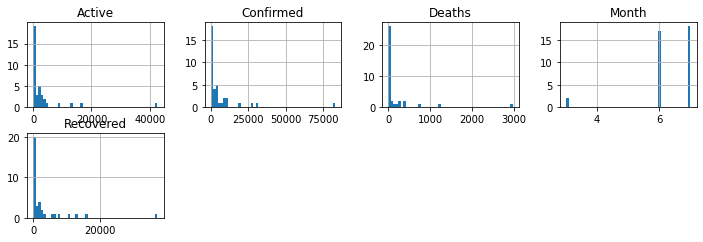

In [14]:
#histogram
columns = list(data)[1:] # Excluding state
data[columns].hist(stacked=False, bins=50, figsize=(12,30), layout=(15,4));

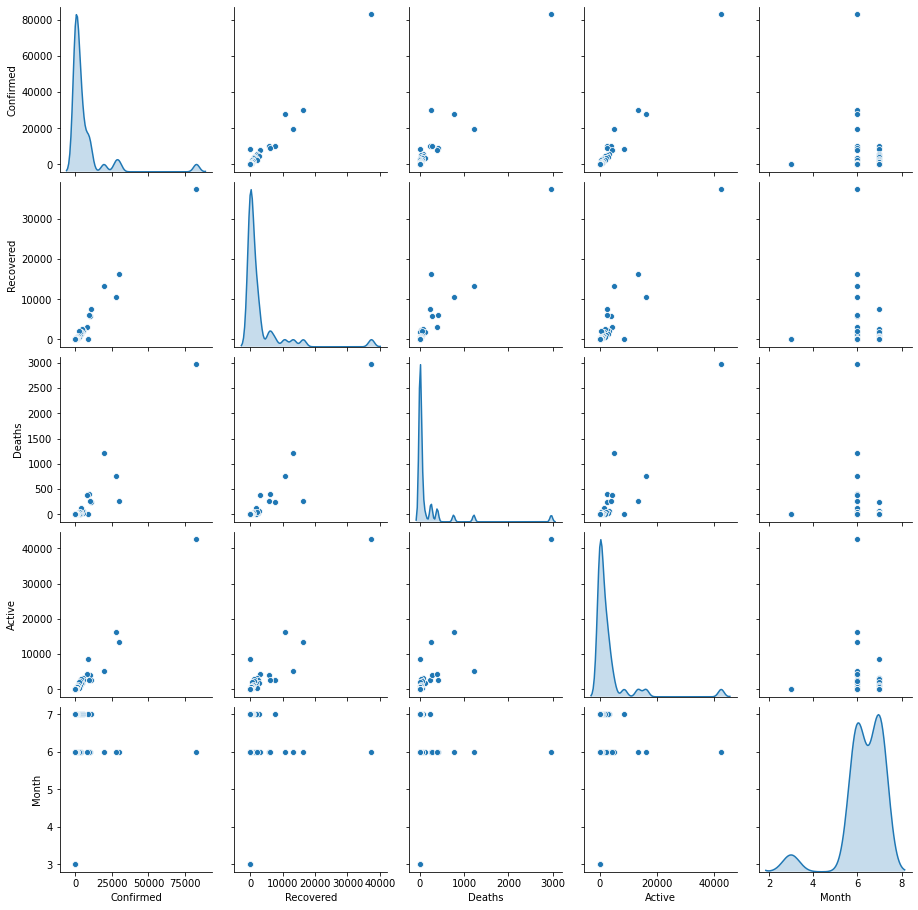

In [15]:
#pairplot
sns.pairplot(data,diag_kind='kde')

# **Visualizations**

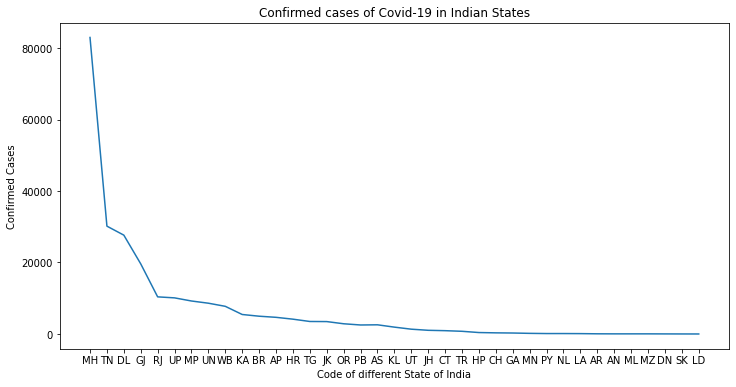

In [17]:
#state vs confirmed
from matplotlib.pyplot import figure
figure(figsize=(12,6))
plt.plot(data['State_code'], data['Confirmed'])
plt.xlabel('Code of different State of India')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed cases of Covid-19 in Indian States')
plt.show()

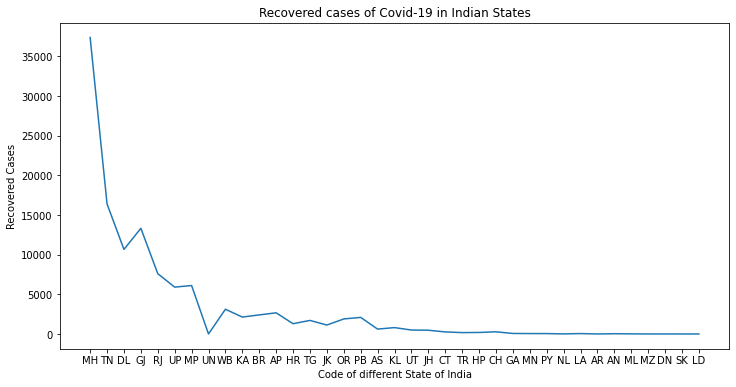

In [18]:
#state vs Recovered
figure(figsize=(12,6))
plt.plot(data['State_code'], data['Recovered'])
plt.xlabel('Code of different State of India')
plt.ylabel('Recovered Cases')
plt.title('Recovered cases of Covid-19 in Indian States')
plt.show()

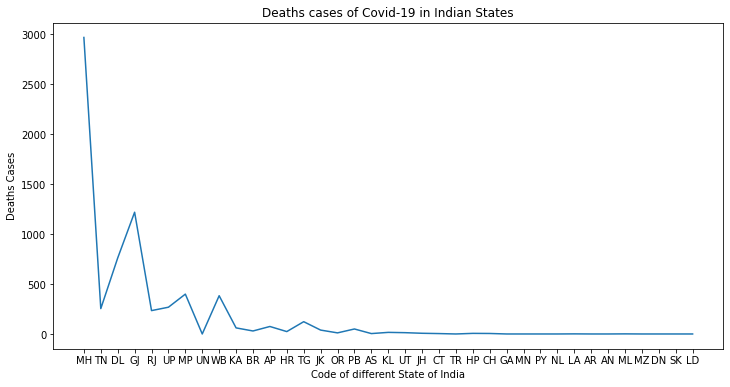

In [19]:
#state vs Deaths
figure(figsize=(12,6))
plt.plot(data['State_code'], data['Deaths'])
plt.xlabel('Code of different State of India')
plt.ylabel('Deaths Cases')
plt.title('Deaths cases of Covid-19 in Indian States')
plt.show()

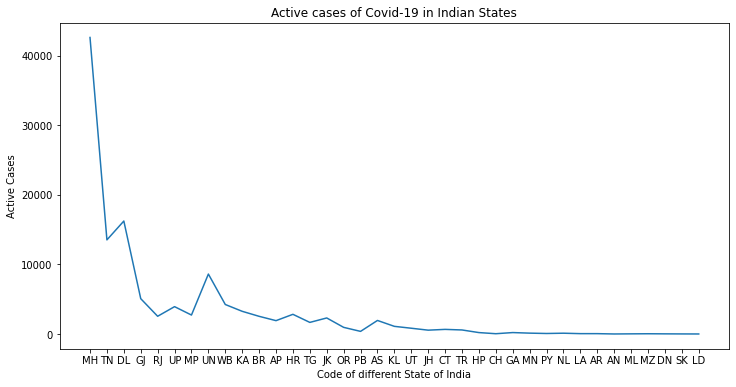

In [20]:
#state vs Active
figure(figsize=(12,6))
plt.plot(data['State_code'], data['Active'])
plt.xlabel('Code of different State of India')
plt.ylabel('Active Cases')
plt.title('Active cases of Covid-19 in Indian States')
plt.show()

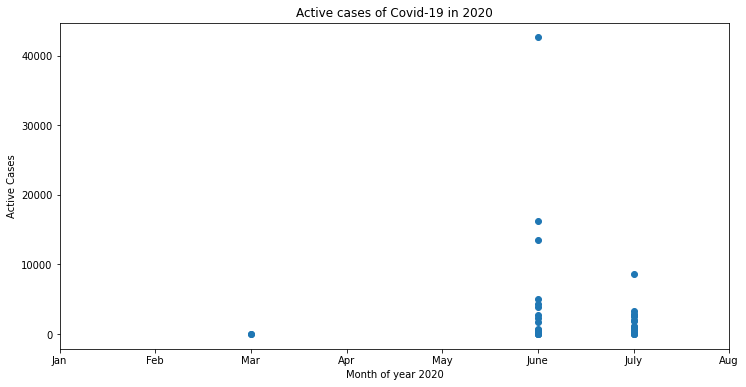

In [21]:
#Month vs Active
figure(figsize=(12,6))
plt.scatter(data['Month'], data['Active'])
plt.xlabel('Month of year 2020')
plt.ylabel('Active Cases')
plt.title('Active cases of Covid-19 in 2020')
plt.xticks([1,2,3,4,5,6,7,8],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug'])
plt.show()

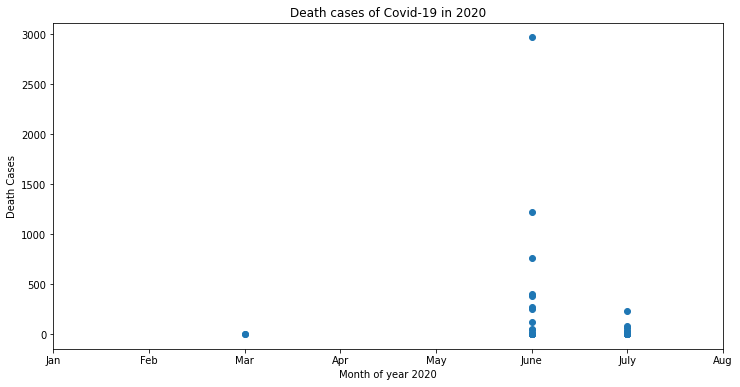

In [23]:
#Month vs Deaths
figure(figsize=(12,6))
plt.scatter(data['Month'], data['Deaths'])
plt.xlabel('Month of year 2020')
plt.ylabel('Death Cases')
plt.title('Death cases of Covid-19 in 2020')
plt.xticks([1,2,3,4,5,6,7,8],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug'])
plt.show()

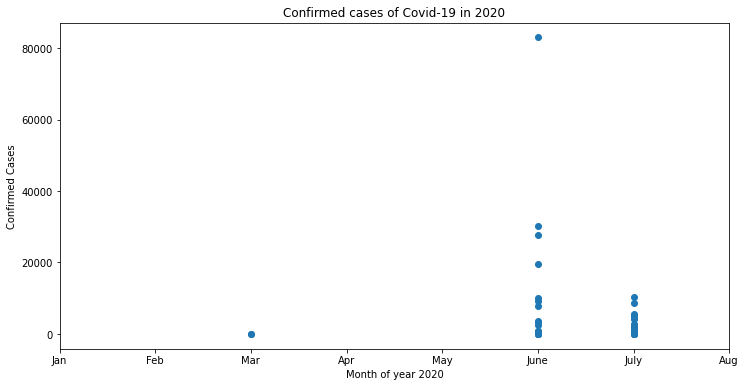

In [24]:
#Month vs Confirmed
figure(figsize=(12,6))
plt.scatter(data['Month'], data['Confirmed'])
plt.xlabel('Month of year 2020')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed cases of Covid-19 in 2020')
plt.xticks([1,2,3,4,5,6,7,8],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug'])
plt.show()

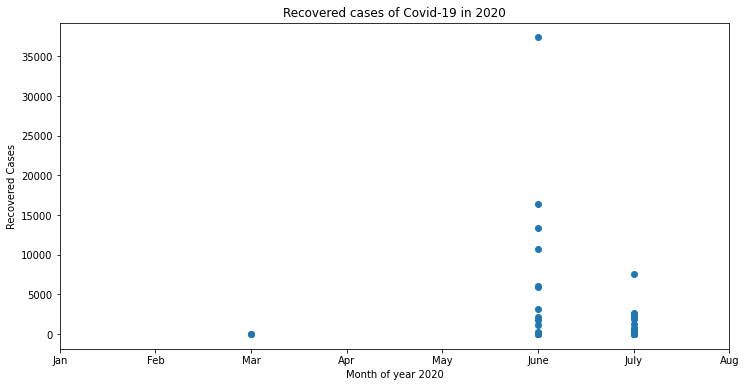

In [25]:
#Month vs Recovered
figure(figsize=(12,6))
plt.scatter(data['Month'], data['Recovered'])
plt.xlabel('Month of year 2020')
plt.ylabel('Recovered Cases')
plt.title('Recovered cases of Covid-19 in 2020')
plt.xticks([1,2,3,4,5,6,7,8],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug'])
plt.show()

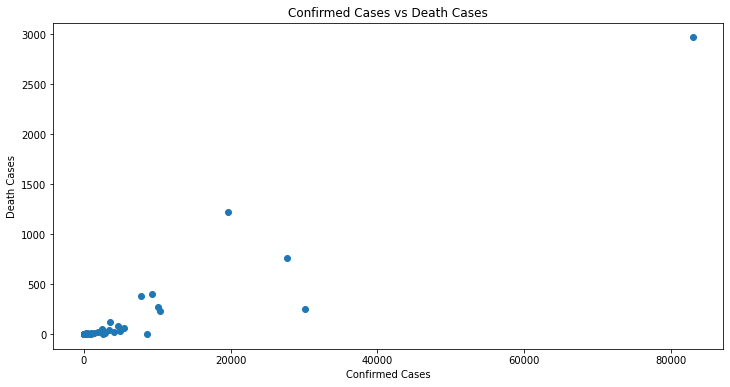

In [26]:
#Confirmed vs Deaths
figure(figsize=(12,6))
plt.scatter(data['Confirmed'], data['Deaths'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Death Cases')
plt.title('Confirmed Cases vs Death Cases')
plt.show()

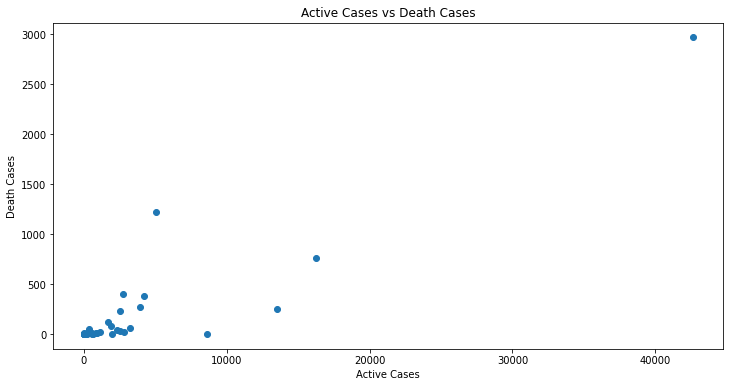

In [27]:
#Active vs Deaths
figure(figsize=(12,6))
plt.scatter(data['Active'], data['Deaths'])
plt.xlabel('Active Cases')
plt.ylabel('Death Cases')
plt.title('Active Cases vs Death Cases')
plt.show()

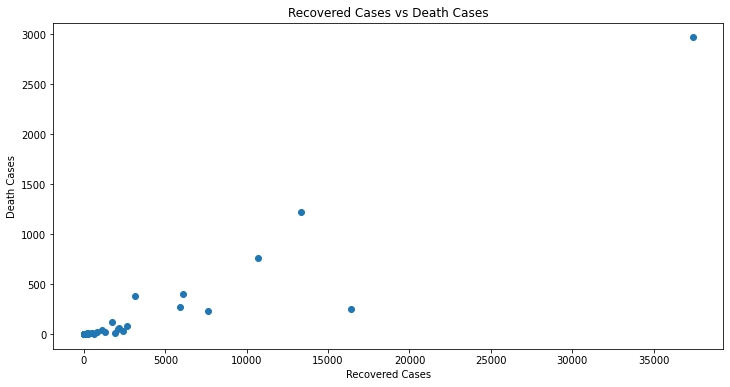

In [28]:
#Recovered vs Deaths
figure(figsize=(12,6))
plt.scatter(data['Recovered'], data['Deaths'])
plt.xlabel('Recovered Cases')
plt.ylabel('Death Cases')
plt.title('Recovered Cases vs Death Cases')
plt.show()

# **Simple Linear Regression**
Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y).

More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.

The line for a simple linear regression model can be written as:
 y = b0 + b1 * x
where b0 and b1 are the coefficients we must estimate from the training data.

In [0]:
#Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# independant variables
x = data[['Confirmed']]
# the dependent variable
y = data[['Recovered']]

In [0]:
# Split x and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [31]:
#fitting the Linear regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# regression coefficients 
print("The coefficient for our model is {}".format(regression_model.coef_))
# regression intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for our model is [[0.46054265]]
The intercept for our model is 153.64343514737448


In [34]:
#Prediction
prediction = regression_model.predict(x_test)  
print(prediction)

[[12889.48988023]
 [  199.2371575 ]
 [ 9188.1086016 ]
 [  498.58988005]
 [  276.60832272]
 [  208.44801051]
 [  578.72430116]
 [  156.8672337 ]
 [  771.23112889]
 [  298.71436992]
 [  175.74948235]
 [ 1335.39587523]]


In [39]:
# R-squared value for Training data
regression_model.score(x_train, y_train)

0.9748235135977374

In [40]:
# R-squared value for Testing data
regression_model.score(x_test, y_test)

0.9024486023611604

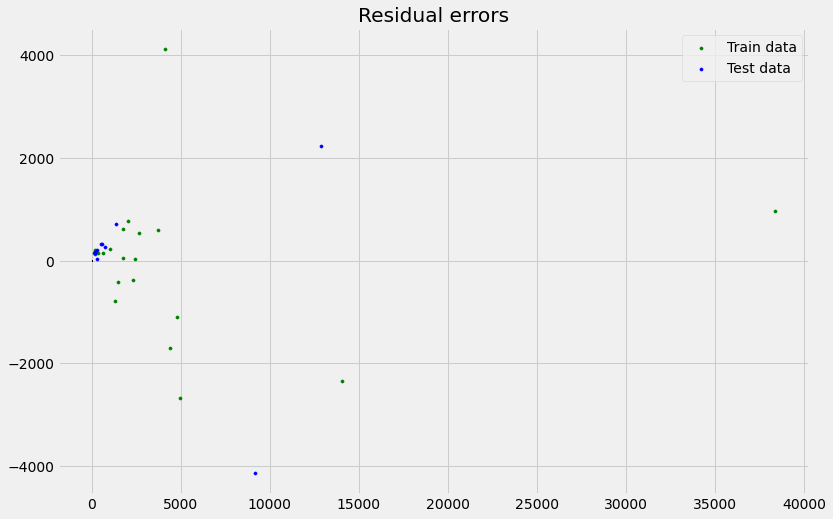

In [43]:
## Residual error plot
# setting plot style 
plt.style.use('fivethirtyeight') 
figure(figsize=(12,8))  
# plotting residual errors in training data 
plt.scatter(regression_model.predict(x_train), regression_model.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
# plotting residual errors in test data 
plt.scatter(regression_model.predict(x_test), regression_model.predict(x_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
# plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 